In [1]:
%matplotlib notebook


In [2]:
from roboticstoolbox import DHRobot, RevoluteDH , PrismaticDH
from math import pi
from spatialmath import SE3
import roboticstoolbox as rtb
#Then we set lenghs and mass of the joints
# link 1
m1 = 1
l1 = 0.670
# link 2
m2 = 1
l2 = 1.075
# link 3
m3 = 1
l3 = 0.225
# link 4
m4 = 1
l4 = 0.245
# link 5
m5 = 1
l5 = 1.280
# link 6
m6 = 1
l6 = 0.215

#Gravity
g = 9.81 

#Thenwe create the joints and put the limits of the joints given in the problem
#Thenwe create the joints and put the limits of the joints given in the problem
L1 = RevoluteDH(d=0.670,a=0.312, m=m1, alpha=-pi/2, qlim=[0, 136*pi/180])
L2 = RevoluteDH(a=1.075,d=0.030,alpha=pi,m=m2, qlim=[0, 312*pi/180])
L3 = RevoluteDH(a=-0.225,d=0,alpha=pi/2, m=m3, qlim=[0, 720*pi/180])
L4 = RevoluteDH(a=0,d=-1.280, m=m4, alpha=-pi/2, qlim=[0, 250*pi/180])
L5 = RevoluteDH(a=0,d=0, m=m5, alpha=pi/2, qlim=[0, 720*pi/180])
L6 = RevoluteDH(a=0,d=-0.215, m=m5, alpha=pi)

#Creation of the robot
robot = DHRobot([L1, L2, L3, L4, L5, L6], gravity=[0, g, 0], name="S2000") 
print(robot)

DHRobot: S2000, 6 joints (RRRRRR), dynamics, standard DH parameters
┏━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃   dⱼ   ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃   0.67 ┃  0.312 ┃ -90.0° ┃    0.0° ┃ 136.0° ┃
┃ q2 ┃   0.03 ┃  1.075 ┃ 180.0° ┃    0.0° ┃ 312.0° ┃
┃ q3 ┃      0 ┃ -0.225 ┃  90.0° ┃    0.0° ┃ 720.0° ┃
┃ q4 ┃  -1.28 ┃      0 ┃ -90.0° ┃    0.0° ┃ 250.0° ┃
┃ q5 ┃      0 ┃      0 ┃  90.0° ┃    0.0° ┃ 720.0° ┃
┃ q6 ┃ -0.215 ┃      0 ┃ 180.0° ┃ -180.0° ┃ 180.0° ┃
┗━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛



<IPython.core.display.Javascript object>


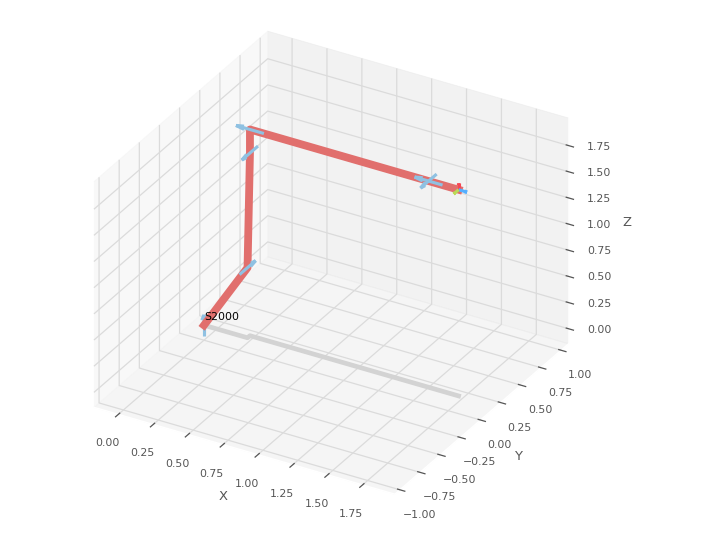

PyPlot3D backend, t = 0.05, scene:
  S2000

In [3]:
robot.addconfiguration('qo',[0,-pi/2,pi,0,0,pi])
robot.addconfiguration('q2',[pi/2,-pi/4,2*pi/3,pi,-pi/2,pi])
robot.plot(robot.qo)

<IPython.core.display.Javascript object>


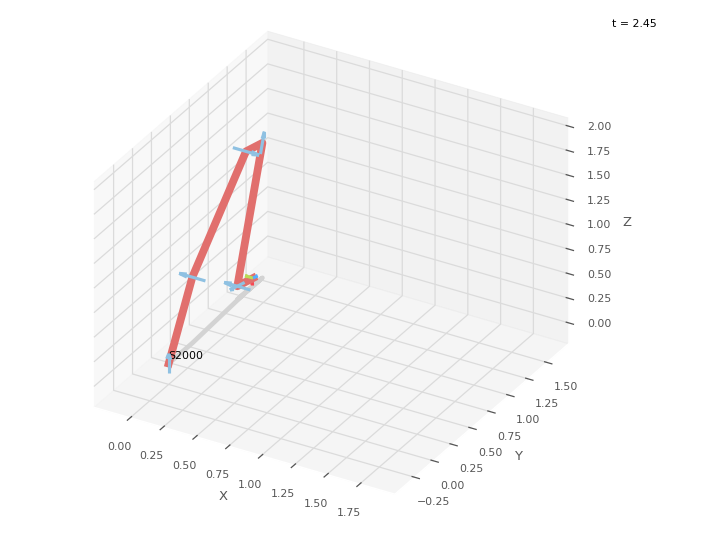

PyPlot3D backend, t = 2.499999999999999, scene:
  S2000

In [4]:
traj = rtb.jtraj(robot.qo, robot.q2,50)
robot.plot(traj.q)

<IPython.core.display.Javascript object>


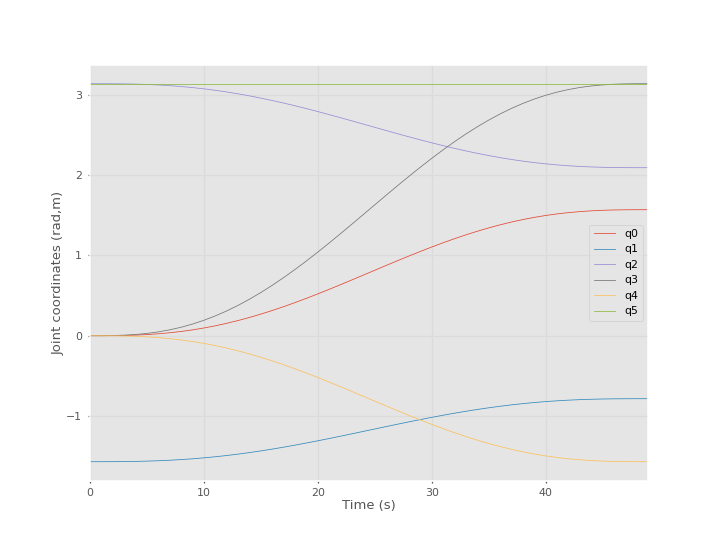

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [5]:
rtb.qplot(traj.q)

In [6]:
T1 = robot.fkine(robot.qo)
T2 = robot.fkine(robot.q2)
print(T1)

   0         0         1         1.807     
   0        -1         0         0.03      
   1         0         0         1.97      
   0         0         0         1         



In [7]:
print(T2)

   0        -1         0        -0.03      
  -0.2588    0         0.9659    1.166     
  -0.9659    0        -0.2588    0.07987   
   0         0         0         1         



In [8]:
q_0=robot.ikine_LM(T1,ilimit=500,rlimit=100,search=True)

search starts at  [1.34840735 2.4016385  8.67825728 1.1830187  5.31740006 2.66490918]


In [9]:
print(traj.q)

[[ 0.00000000e+00 -1.57079633e+00  3.14159265e+00  0.00000000e+00
   0.00000000e+00  3.14159265e+00]
 [ 1.29461641e-04 -1.57073160e+00  3.14150635e+00  2.58923282e-04
  -1.29461641e-04  3.14159265e+00]
 [ 1.00379622e-03 -1.57029443e+00  3.14092346e+00  2.00759244e-03
  -1.00379622e-03  3.14159265e+00]
 [ 3.28196187e-03 -1.56915535e+00  3.13940468e+00  6.56392374e-03
  -3.28196187e-03  3.14159265e+00]
 [ 7.53283132e-03 -1.56702991e+00  3.13657077e+00  1.50656626e-02
  -7.53283132e-03  3.14159265e+00]
 [ 1.42391957e-02 -1.56367673e+00  3.13209986e+00  2.84783914e-02
  -1.42391957e-02  3.14159265e+00]
 [ 2.38017682e-02 -1.55889544e+00  3.12572481e+00  4.76035364e-02
  -2.38017682e-02  3.14159265e+00]
 [ 3.65431882e-02 -1.55252473e+00  3.11723053e+00  7.30863764e-02
  -3.65431882e-02  3.14159265e+00]
 [ 5.27120246e-02 -1.54444031e+00  3.10645130e+00  1.05424049e-01
  -5.27120246e-02  3.14159265e+00]
 [ 7.24867801e-02 -1.53455294e+00  3.09326813e+00  1.44973560e-01
  -7.24867801e-02  3.1415

In [10]:
print(robot.ikine_LM(T1,q0=robot.qo,ilimit=800,rlimit=200,tol=1e-100,transpose=0.2)[0])

[-2.78538545e-20 -1.57079633e+00  3.14159265e+00 -4.99172496e-50
  7.09962621e-35  3.14159265e+00]


In [11]:
print(robot.ikine_LM(T2,q0=robot.qo,ilimit=1000,rlimit=100,tol=1e-100,transpose=0.2))

IKsolution(q=array([ 1.57079633, -0.78539816,  2.0943951 ,  3.14159265, -1.57079633,
        3.14159265]), success=False, reason='iteration limit 1000 exceeded', iterations=1001, residual=2.478606997030189e-15)


<IPython.core.display.Javascript object>


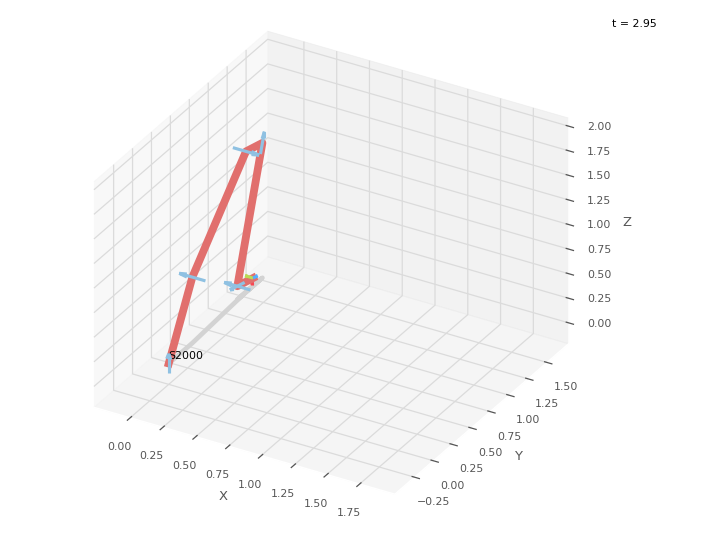

PyPlot3D backend, t = 2.9999999999999973, scene:
  S2000

In [12]:
q3 = robot.ikine_LM(T1,q0=robot.qo,ilimit=800,rlimit=200,tol=1e-100,transpose=0.2)[0]
q4 = robot.ikine_LM(T2,q0=robot.qo,ilimit=1000,rlimit=100,tol=1e-100,transpose=0.2)[0]

#5th order polynomial interpolation
traj2 = rtb.jtraj(q3, q4, 60)
robot.plot(traj2.q)
#print(traj.q)

In [13]:
#Aditional we present an spherical interpolation for rotation on the arm

import numpy as np
from pyquaternion import Quaternion

T6 = np.array([[0,0,1,1.807],[0,-1,0,0.03],[1,0,0,1.97],[0,0,0,1]])
T7 = np.array([[0,-1,0,-0.03],[-0.25881905,0,0.96592583,1.16585878],[-0.96592583,0,-0.25881905,0.07987435],[0,0,0,1]])

q6 = Quaternion(matrix=T6) 
q7 = Quaternion(matrix=T7)
qs = []
print(q6)
print()

print(q7)
print()

t6_1=Quaternion.slerp(q6, q7, 0).transformation_matrix
print(t6_1)
print()

t7_1=Quaternion.slerp(q6, q7, 1).transformation_matrix
print(t7_1)

0.000 +0.707i +0.000j +0.707k

0.430 -0.561i +0.561j +0.430k

[[-2.23711432e-17  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -2.23711432e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

[[ 8.32667268e-17 -1.00000000e+00  5.55111512e-17  0.00000000e+00]
 [-2.58819045e-01  5.55111512e-17  9.65925826e-01  0.00000000e+00]
 [-9.65925826e-01 -5.06191737e-17 -2.58819045e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [14]:
q_p  = robot.ikine_LM(SE3(Quaternion.slerp(q6, q7, 0).transformation_matrix)[0],q0=robot.qo,ilimit=1000,rlimit=100,tol=1e-100,transpose=0.2)[0]
print(q_p)
print()
q_p2 =robot.ikine_LM(SE3(Quaternion.slerp(q6, q7, 1).transformation_matrix)[0],q0=robot.qo,ilimit=1000,rlimit=100,tol=1e-100,transpose=0.2)[0]
print(q_p2)

[ 0.13826793 -2.58159017  0.68743524 -0.13942199  1.44458786 -3.12393519]

[-1.57502501  0.06712174  1.89352426 -0.41570341  0.01013161 -2.72483592]


<IPython.core.display.Javascript object>


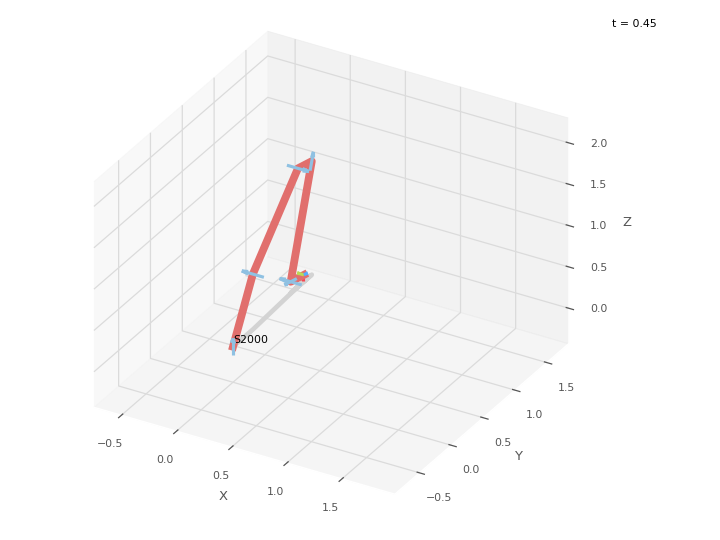

PyPlot3D backend, t = 0.49999999999999994, scene:
  S2000

In [15]:
qs.append(robot.ikine_LM(T1,q0=robot.qo,ilimit=800,rlimit=200,tol=1e-100,transpose=0.2)[0])

for i in np.arange(0.1,0.9,0.1):
    q  = robot.ikine_LM(SE3(Quaternion.slerp(q6, q7, i).transformation_matrix)[0],q0=robot.qo,ilimit=1000,rlimit=100,tol=1e-100,transpose=0.2)[0]
    qs.append(q)
    
qf=robot.ikine_LM(T2,q0=robot.qo,ilimit=800,rlimit=200,tol=1e-100,transpose=0.2)[0]    
qs.append(qf)

robot.plot(np.array(qs))
#print(qs)

[[ 0.     0.     1.     1.807]
 [ 0.    -1.     0.     0.03 ]
 [ 1.     0.     0.     1.97 ]
 [ 0.     0.     0.     1.   ]]


C:\Users\carax\anaconda3\lib\site-packages\pytransform3d\rotations\_conversions.py:1602: RuntimeWarning: invalid value encountered in true_divide
  a[:3] /= np.linalg.norm(a[:3])


<IPython.core.display.Javascript object>


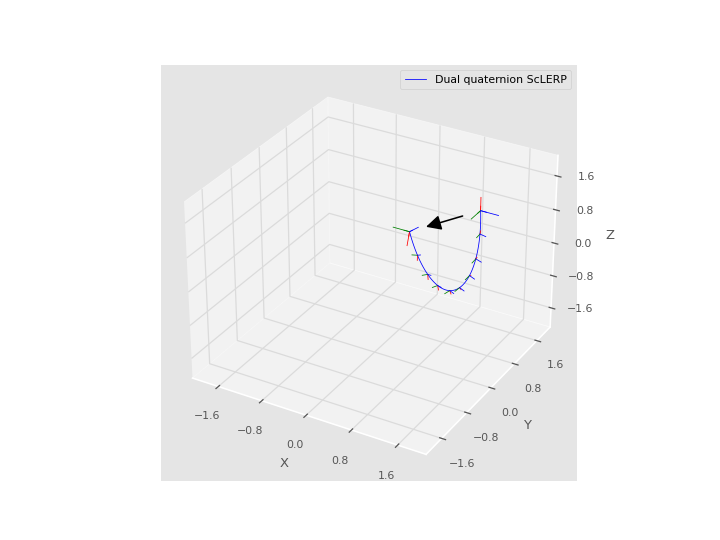

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pytransform3d.transformations as pt
import pytransform3d.trajectories as ptr
import pytransform3d.plot_utils as ppu



pose1 = np.copy(T6)
pose2 = np.copy(T7)
print(pose1)
dq1 = pt.dual_quaternion_from_transform(pose1)
dq2 = pt.dual_quaternion_from_transform(pose2)
Stheta1 = pt.exponential_coordinates_from_transform(pose1)
Stheta2 = pt.exponential_coordinates_from_transform(pose2)

n_steps = 60

# Screw linear interpolation of dual quaternions (ScLERP)
sclerp_interpolated_dqs = np.vstack([pt.dual_quaternion_sclerp(dq1, dq2, t) for t in np.linspace(0, 1, n_steps)])
sclerp_interpolated_poses_from_dqs = np.array([pt.transform_from_dual_quaternion(dq) for dq in sclerp_interpolated_dqs])


ax = pt.plot_transform(A2B=pose1, s=0.3, ax_s=2)
pt.plot_transform(A2B=pose2, s=0.3, ax=ax)


traj_from_dqs_sclerp = ppu.Trajectory(sclerp_interpolated_poses_from_dqs, s=0.1, c="b")
traj_from_dqs_sclerp.add_trajectory(ax)
plt.legend([traj_from_dqs_sclerp.trajectory],["Dual quaternion ScLERP"])
plt.show()

In [17]:
sclerp_interpolated_poses_from_dqs #transformation matrices of each point

array([[[-2.22044605e-16,  0.00000000e+00,  1.00000000e+00,
          1.80700000e+00],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00,
          3.00000000e-02],
        [ 1.00000000e+00,  0.00000000e+00,  2.22044605e-16,
          1.97000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[ 3.51868332e-02, -5.26555455e-03,  9.99366880e-01,
          1.82906607e+00],
        [-3.53506968e-02, -9.99366880e-01, -4.02088745e-03,
         -7.29749482e-03],
        [ 9.98755333e-01, -3.51868332e-02, -3.53506968e-02,
          1.91253588e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[ 7.01214521e-02, -1.17625549e-02,  9.97469109e-01,
          1.84889980e+00],
        [-7.07764947e-02, -9.97469109e-01, -6.78701173e-03,
         -4.26287043e-02],
        [ 9.95024457e-01, -7.01214521e-02, -7.07764947e-02,
          1.85305085e+00],
        [ 0.00000000e+00,  0.00000000e+

In [18]:
position =[]
for matrix in sclerp_interpolated_poses_from_dqs:
    q  = robot.ikine_LM(SE3(matrix)[0],q0=robot.qo,ilimit=1000,rlimit=100,tol=1e-100,transpose=0.2)[0]
    position.append(q)


<IPython.core.display.Javascript object>


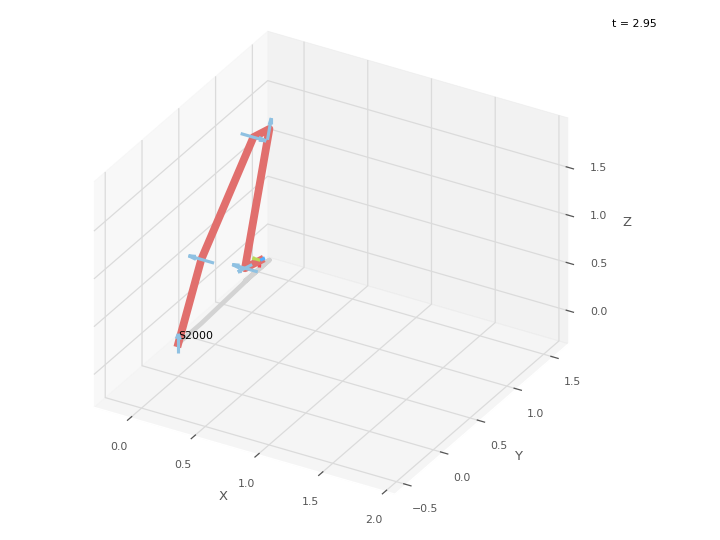

PyPlot3D backend, t = 2.9999999999999973, scene:
  S2000

In [19]:
robot.plot(np.array(position))

<IPython.core.display.Javascript object>


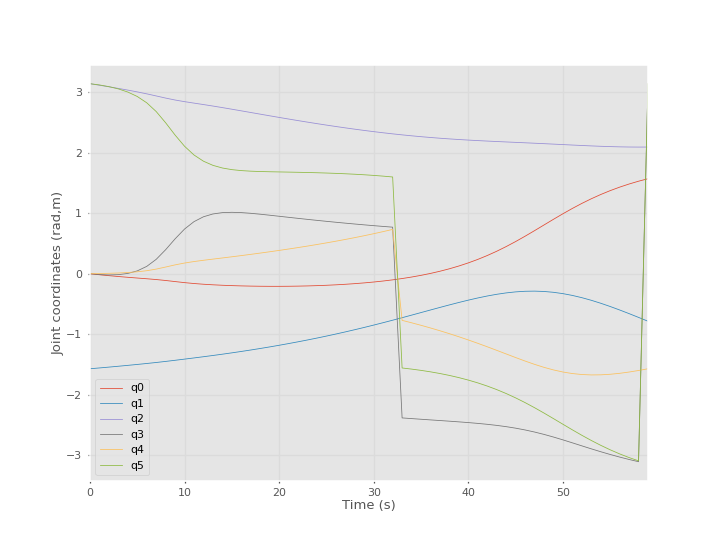

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [20]:
rtb.qplot(np.array(position))

In [21]:
i = 0
compar01 = []
compar23 = []
compar45 = []
for pos in position:
    compar01.append([np.array(traj2.q)[i][0],np.array(position)[i][0],np.array(traj2.q)[i][1],np.array(position)[i][1]])
    compar23.append([np.array(traj2.q)[i][2],np.array(position)[i][2],np.array(traj2.q)[i][3],np.array(position)[i][3]])
    compar45.append([np.array(traj2.q)[i][4],np.array(position)[i][4],np.array(traj2.q)[i][5],np.array(position)[i][5]])
    i=i+1

<IPython.core.display.Javascript object>


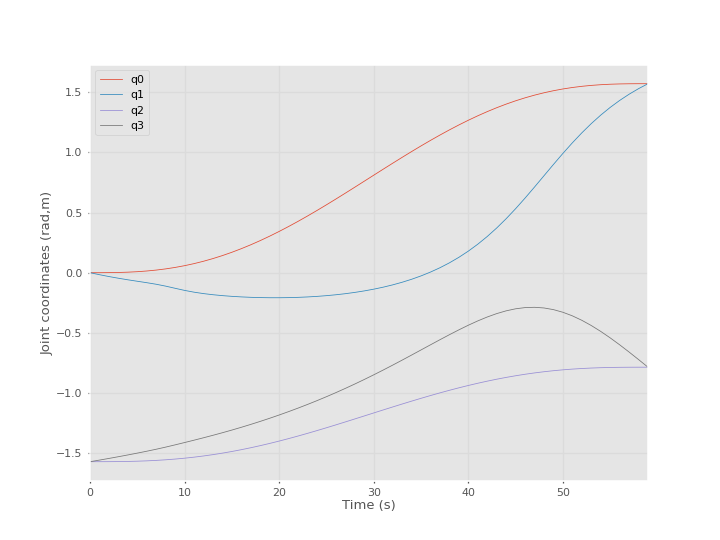

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [22]:
rtb.qplot(np.array(compar01))

<IPython.core.display.Javascript object>


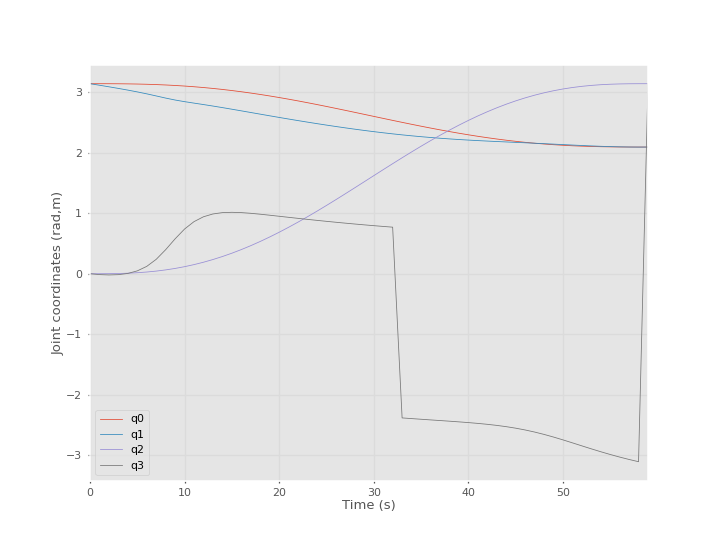

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [23]:
rtb.qplot(np.array(compar23))

<IPython.core.display.Javascript object>


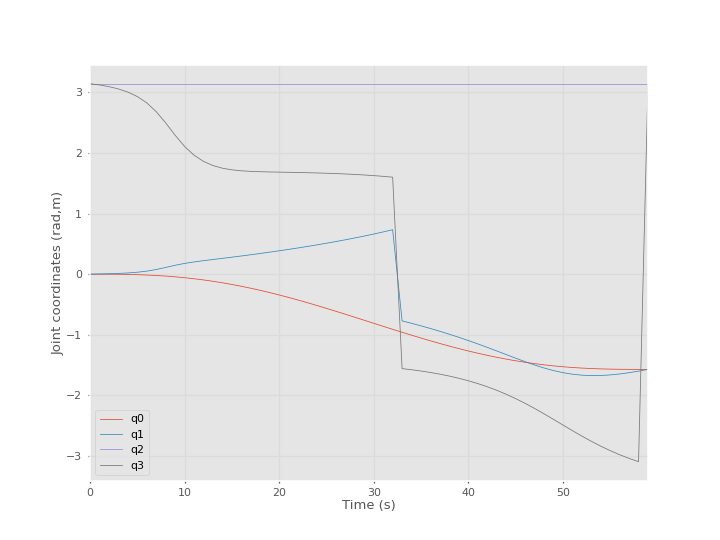

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [24]:
rtb.qplot(np.array(compar45))

In [42]:
#Another Way(Incomplete)
'''
from dual_quaternions import *
import math as ma

dq1 = DualQuaternion.from_homogeneous_matrix(T6)
dq2 = DualQuaternion.from_homogeneous_matrix(T7)

tau = np.arange(0,1,0.1)
prev = dq1.quaternion_conjugate()*dq2
l, m, theta, d = prev.screw()
c = []

for t in tau:
    p = np.array([ma.cos(t*theta/2), ma.sin(t*theta/2)*l])
    q = np.array([-1*t*d/2*ma.sin(t*theta/2), t*d/2*ma.cos(t*theta/2)*l])     ma.sin(t*theta/2*m)
    e = prev^t #Exponential is missing
    #Product 
    #c.append()
print(theta)
'''


'\nfrom dual_quaternions import *\nimport math as ma\n\ndq1 = DualQuaternion.from_homogeneous_matrix(T6)\ndq2 = DualQuaternion.from_homogeneous_matrix(T7)\n\ntau = np.arange(0,1,0.1)\nprev = dq1.quaternion_conjugate()*dq2\nl, m, theta, d = prev.screw()\nc = []\n\nfor t in tau:\n    p = np.array([ma.cos(t*theta/2), ma.sin(t*theta/2)*l])\n    q = np.array([-1*t*d/2*ma.sin(t*theta/2), t*d/2*ma.cos(t*theta/2)*l])     ma.sin(t*theta/2*m)\n    e = prev^t #Exponential is missing\n    #Product \n    #c.append()\nprint(theta)\n'